In [1]:
import plotly.express as px
import plotly.graph_objects as go
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime as dt
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import seaborn as sns

# warnings
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

# Hide warning temporarily
pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv("data/flights_sample_2m.csv")

In [3]:
dow_category = CategoricalDtype(categories=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday",
                                            "Saturday", "Sunday"], ordered=True)

df["FL_DATE"] = pd.to_datetime(df["FL_DATE"])
df["YEAR"] = df["FL_DATE"].dt.year
df["MONTH"] = df["FL_DATE"].dt.month
df["QUARTER"] = ((df["MONTH"] -1)//3)+1
df["DAY_OF_WEEK"] = df["FL_DATE"].dt.dayofweek.map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
                                                     4: 'Friday', 5: 'Saturday', 6: 'Sunday'}).astype(dow_category)

df["DISTANCE_CAT"] = pd.cut(
    df["DISTANCE"], bins = [-1, 500, 1500, float("inf")],
    labels = ["Short-haul", "Medium-haul", "Long-haul"]
)

In [4]:
# Number of flights delayed
n_flight_delay = (df['ARR_DELAY'] > 15).sum()

# Number of flights cancelled
n_flight_cancel = (df['CANCELLED'] == 1).sum()

# number of flights diverted
n_flight_divert = (df['DIVERTED'] == 1).sum()

# number of on-time flights
n_flight_ontime = (df['ARR_DELAY'] <= 15).sum()

n_flights = len(df)

lst_airline = sorted(df['AIRLINE'].unique())
n_airlines = len(lst_airline)

print(f"=====Overall Dataset=====")
print(f"Total flights: {n_flights:,}")
print(f"Total airlines; {n_airlines}")
print(f"There are {n_flight_delay:,} flights delayed")
print(f"There are {n_flight_cancel:,} flights cancelled")
print(f"There are {n_flight_divert:,} flights cancelled")
print(f"There are {n_flight_ontime:,} on-time flights")

=====Overall Dataset=====
Total flights: 2,000,000
Total airlines; 18
There are 343,875 flights delayed
There are 52,522 flights cancelled
There are 4,709 flights cancelled
There are 1,598,894 on-time flights


In [5]:
lst_airline

['Alaska Airlines Inc.',
 'Allegiant Air',
 'American Airlines Inc.',
 'Delta Air Lines Inc.',
 'Endeavor Air Inc.',
 'Envoy Air',
 'ExpressJet Airlines LLC d/b/a aha!',
 'Frontier Airlines Inc.',
 'Hawaiian Airlines Inc.',
 'Horizon Air',
 'JetBlue Airways',
 'Mesa Airlines Inc.',
 'PSA Airlines Inc.',
 'Republic Airline',
 'SkyWest Airlines Inc.',
 'Southwest Airlines Co.',
 'Spirit Air Lines',
 'United Air Lines Inc.']

In [7]:
df_flights = df.copy()

In [8]:
flights_yearly = df_flights.groupby("YEAR")["FL_DATE"].count().reset_index(name="Total_Flights")
flights_yearly

,YEAR,Total_Flights
0,2019,505345
1,2020,318768
2,2021,407824
3,2022,457760
4,2023,310303


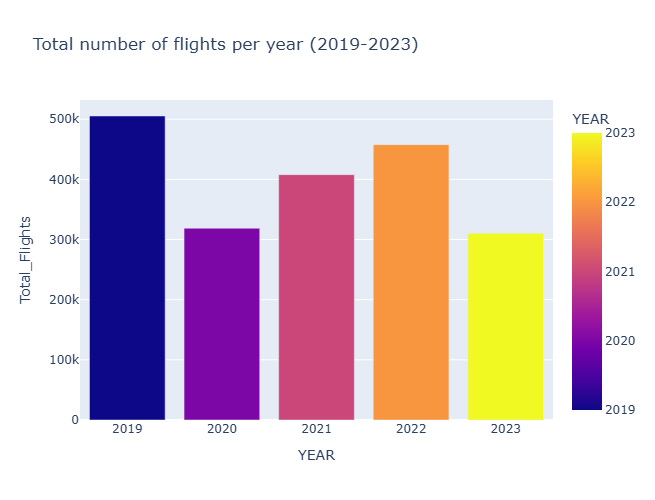

In [9]:
fig_flights_yearly = px.bar(flights_yearly, 
             x='YEAR', y='Total_Flights',
            title="Total number of flights per year (2019-2023)",
            color="YEAR", height=500)
fig_flights_yearly.show()

In [10]:
flights_monthly = df_flights.groupby(["YEAR","MONTH"])["FL_DATE"].count().reset_index(name="Total_Flights")
flights_monthly

,YEAR,MONTH,Total_Flights
0,2019,1,39568
1,2019,2,35912
2,2019,3,43208
3,2019,4,41136
4,2019,5,43293
5,2019,6,43584
6,2019,7,44850
7,2019,8,45015
8,2019,9,41281
9,2019,10,43438


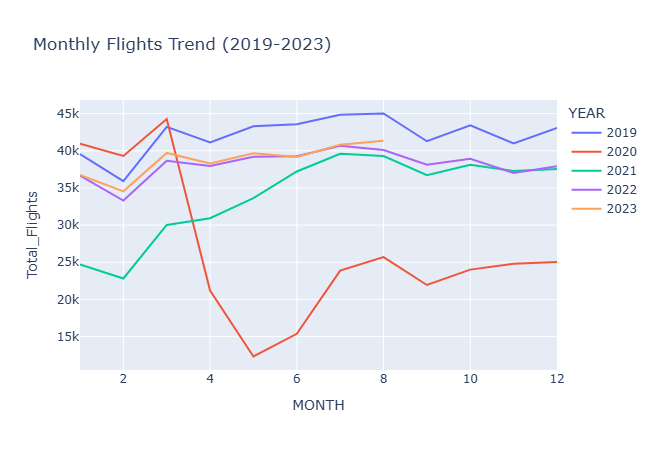

In [11]:
fig_flights_monthly = px.line(flights_monthly,
                             x='MONTH', y='Total_Flights',
                             color='YEAR',
                             title='Monthly Flights Trend (2019-2023)',
                             height=450)
fig_flights_monthly.show()

In [32]:
def plot_yearly_flights_by_airline(df, airline_name):
    airline_df = df[df['AIRLINE'] == airline_name]

    airline_yearly = (
        airline_df.groupby("YEAR")["FL_DATE"]
        .count()
        .reset_index(name="Total_Flights"))

    fig = px.bar(
        airline_yearly,
        x="YEAR", y="Total_Flights",
        title=f"Total number of flights of {airline_name} per year (2019–2023)",
        color="YEAR", height=500)
    
    fig.show()
    return airline_yearly

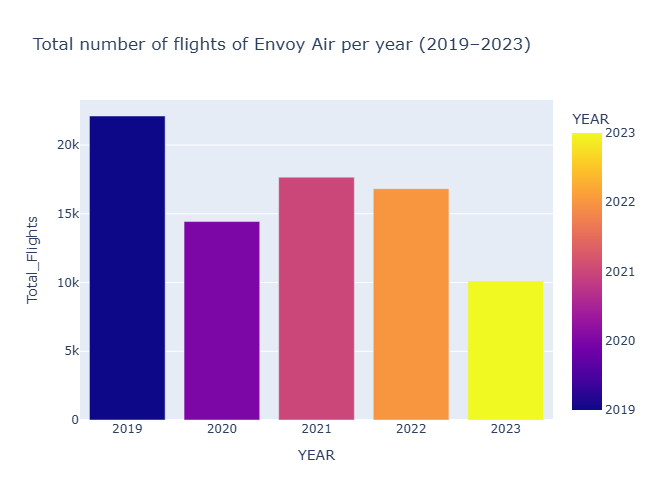

,YEAR,Total_Flights
0,2019,22111
1,2020,14435
2,2021,17665
3,2022,16823
4,2023,10111


In [33]:
plot_yearly_flights_by_airline(df_flights, "Envoy Air")

In [36]:
def plot_monthly_flights_by_airline(df, airline_name):
    airline_df = df[df['AIRLINE'] == airline_name]

    airline_monthly = (
        airline_df.groupby(["YEAR","MONTH"])["FL_DATE"]
        .count()
        .reset_index(name="Total_Flights"))

    fig = px.line(flights_monthly,
                  x='MONTH', y='Total_Flights',
                  color='YEAR',
                  title=f'Monthly Flights Trend of {airline_name} (2019-2023)',
                  height=400)
    
    fig.show()
    return airline_monthly

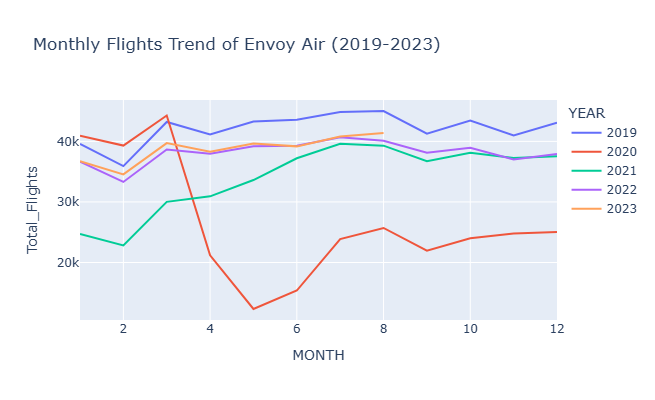

,YEAR,MONTH,Total_Flights
0,2019,1,1751
1,2019,2,1531
2,2019,3,1785
3,2019,4,1761
4,2019,5,1933
5,2019,6,1923
6,2019,7,1999
7,2019,8,2106
8,2019,9,1877
9,2019,10,1875


In [37]:
plot_monthly_flights_by_airline(df_flights, "Envoy Air")